# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

Per esplorare diversi modelli di NN, considero sempre:
- 10000 punti nel Dataset di training
- 1000 punti nel Dataset di test
- 30 epoche
- rumore gaussiano dei dati di training e test con $\sigma$ = 0
- batch size = 30



### Plot dei dati di training e target

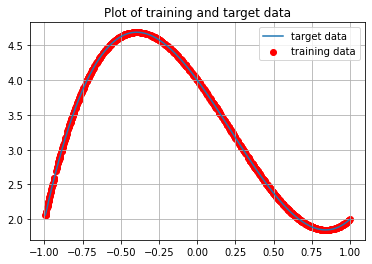

In [117]:
# target parameters of f(x) = 4 - 3x - 2x^2 + 3x^3
a0 = 4 
a1 = -3
a2 = -2
a3 = 3

import numpy as np

# generate training inputs
np.random.seed(2)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = a0 + a1*x_valid + a2*(x_valid**2) + a3*(x_valid**3) # ideal (target) function

sigma = 0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a0 + a1*x_train + a2*(x_train**2) + a3*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a0 + a1*x_valid + a2*(x_valid**2) + a3*(x_valid**3), sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target data')
plt.scatter(x_valid, y_valid, color='r', label='training data')
plt.title('Plot of training and target data')
plt.legend()
plt.grid(True); plt.show()

### Modelli di NN utilizzati

Ho dapprima testato 3 modelli con diversi layers e neuroni, Stochastic gradient descent come optimizer e Minimum squared error come loss function, quindi ne ho aggiunti altri 3 (con la configurazione di layers e neuroni del migliore dei primi tre) nei quali ho testato un nuovo optimizer e una nuova loss function;

- modello 1: 3 layers con neuroni (1, 4, 1) e funzione di attivazione Sigmoid per il layer centrale; 

- modello 2: 5 layers con neuroni (1, 4, 8, 4, 1) e funzione di attivazione sigmoid per il layer centrale;

- modello 3: come il due, ma con funzione di attivazione softplus per i layer 2 e 4;

- modello 4: come il 2, con optimizer adagrad;

- modello 5: come il 2, con loss function minimum absolute error;

- modello 6: come il 2, con optimizer adagrad e loss function minimum absolute error;

In [124]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
# primo modello, con un layer da 1 neurone
model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.add(Dense(4, activation='sigmoid'))
model1.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model1.summary()

# secondo modello, con due layers da 1 neurone
model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))
model2.add(Dense(4))
model2.add(Dense(8, activation='sigmoid'))
model2.add(Dense(4))
model2.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model2.summary()

# terzo modello, con due layers da 1 neurone, ottimizzato con Adadelta
model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))
model3.add(Dense(4, activation='softplus'))
model3.add(Dense(8, activation='sigmoid'))
model3.add(Dense(4, activation='softplus'))
model3.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model3.summary()

# quarto modello, con due layers da 1 neurone
model4 = tf.keras.Sequential()
model4.add(Dense(1, input_shape=(1,)))
model4.add(Dense(4))
model4.add(Dense(8, activation='sigmoid'))
model4.add(Dense(4))
model4.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model4.compile(optimizer='adagrad', loss='mse', metrics=['mse'])
# get a summary of our composed model
model4.summary()

# quinto modello, con due layers da 1 neurone
model5 = tf.keras.Sequential()
model5.add(Dense(1, input_shape=(1,)))
model5.add(Dense(4))
model5.add(Dense(8, activation='sigmoid'))
model5.add(Dense(4))
model5.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model5.compile(optimizer='sgd', loss='mae', metrics=['mse'])
# get a summary of our composed model
model5.summary()

# sesto modello, con due layers da 1 neurone
model6 = tf.keras.Sequential()
model6.add(Dense(1, input_shape=(1,)))
model6.add(Dense(4))
model6.add(Dense(8, activation='sigmoid'))
model6.add(Dense(4))
model6.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model6.compile(optimizer='adagrad', loss='mae', metrics=['mse'])
# get a summary of our composed model
model6.summary()


Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_143 (Dense)            (None, 4)                 8         
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 5         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_146 (Dense)            (None, 4)                 8         
__________________________________

### Fit dei modelli

In [127]:
history1 = model1.fit(x=x_train, y=y_train, 
          batch_size=25, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid))

history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=25, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid))
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=25, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid))
history4 = model4.fit(x=x_train, y=y_train, 
          batch_size=25, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid))

history5 = model5.fit(x=x_train, y=y_train, 
          batch_size=25, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid))
history6 = model6.fit(x=x_train, y=y_train, 
          batch_size=25, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid))


Epoch 1/30
400/400 [==============================] - 1s 1ms/step - loss: 1.3683 - mse: 1.3683 - val_loss: 0.6833 - val_mse: 0.6833
Epoch 2/30
400/400 [==============================] - 0s 1ms/step - loss: 0.5115 - mse: 0.5115 - val_loss: 0.3625 - val_mse: 0.3625
Epoch 3/30
400/400 [==============================] - 0s 1ms/step - loss: 0.3557 - mse: 0.3557 - val_loss: 0.2858 - val_mse: 0.2858
Epoch 4/30
400/400 [==============================] - 0s 1ms/step - loss: 0.3038 - mse: 0.3038 - val_loss: 0.2571 - val_mse: 0.2571
Epoch 5/30
400/400 [==============================] - 1s 1ms/step - loss: 0.2795 - mse: 0.2795 - val_loss: 0.2385 - val_mse: 0.2385
Epoch 6/30
400/400 [==============================] - 1s 1ms/step - loss: 0.2614 - mse: 0.2614 - val_loss: 0.2240 - val_mse: 0.2240
Epoch 7/30
400/400 [==============================] - 1s 1ms/step - loss: 0.2475 - mse: 0.2475 - val_loss: 0.2148 - val_mse: 0.2148
Epoch 8/30
400/400 [==============================] - 0s 1ms/step - loss: 0.

### Performance dei modelli

Dalle performance dei modelli sul validation set e sui dati target si può subito vedere che i modelli 1, 4, 6 risultano inadatti a descrivere i dati; i modelli 3, 5 hanno un'efficienza intermedia mentre il modello 2 è decisamente il migliore

In [130]:
# evaluate model
print('Modello 1:')
score = model1.evaluate(x_valid, y_valid, batch_size=30, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
print('Modello 2:')
score2 = model2.evaluate(x_valid, y_valid, batch_size=30, verbose=1)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
print()
print('Modello 3:')
score3 = model3.evaluate(x_valid, y_valid, batch_size=30, verbose=1)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])
print()
print('Modello 4:')
score4 = model4.evaluate(x_valid, y_valid, batch_size=30, verbose=1)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])
print()
print('Modello 5:')
score5 = model5.evaluate(x_valid, y_valid, batch_size=30, verbose=1)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])
print()
print('Modello 6:')
score6 = model6.evaluate(x_valid, y_valid, batch_size=30, verbose=1)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

score11 = model.evaluate(x_valid, y_target, batch_size=30, verbose=1)
score21 = model2.evaluate(x_valid, y_target, batch_size=30, verbose=1)
score31 = model3.evaluate(x_valid, y_target, batch_size=30, verbose=1)
score41 = model4.evaluate(x_valid, y_target, batch_size=30, verbose=1)
score51 = model5.evaluate(x_valid, y_target, batch_size=30, verbose=1)
score61 = model6.evaluate(x_valid, y_target, batch_size=30, verbose=1)

# print performance
print()
print('Performance sui dati target')
print('Modello 1:')
print('Test loss:', score11[0])
print('Test accuracy:', score11[1])
print()
print('Modello 2:')
print('Test loss:', score21[0])
print('Test accuracy:', score21[1])
print()
print('Modello 3:')
print('Test loss:', score31[0])
print('Test accuracy:', score31[1])
print()
print('Modello 4:')
print('Test loss:', score41[0])
print('Test accuracy:', score41[1])
print()
print('Modello 5:')
print('Test loss:', score51[0])
print('Test accuracy:', score51[1])
print()
print('Modello 6:')
print('Test loss:', score61[0])
print('Test accuracy:', score61[1])


Modello 1:
34/34 [==============================] - 0s 1ms/step - loss: 0.1042 - mse: 0.1042
Test loss: 0.10424348711967468
Test accuracy: 0.10424348711967468

Modello 2:
34/34 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018
Test loss: 0.0017655394040048122
Test accuracy: 0.0017655394040048122

Modello 3:
34/34 [==============================] - 0s 1ms/step - loss: 0.0128 - mse: 0.0128
Test loss: 0.0128360940143466
Test accuracy: 0.0128360940143466

Modello 4:
34/34 [==============================] - 0s 1ms/step - loss: 0.5325 - mse: 0.5325
Test loss: 0.532463550567627
Test accuracy: 0.532463550567627

Modello 5:
34/34 [==============================] - 0s 1ms/step - loss: 0.0926 - mse: 0.0123
Test loss: 0.09261102229356766
Test accuracy: 0.012347531504929066

Modello 6:
34/34 [==============================] - 0s 1ms/step - loss: 0.7254 - mse: 0.7482
Test loss: 0.725425124168396
Test accuracy: 0.7482100129127502
34/34 [==============================] - 0s 1

### Confronto dei risultati

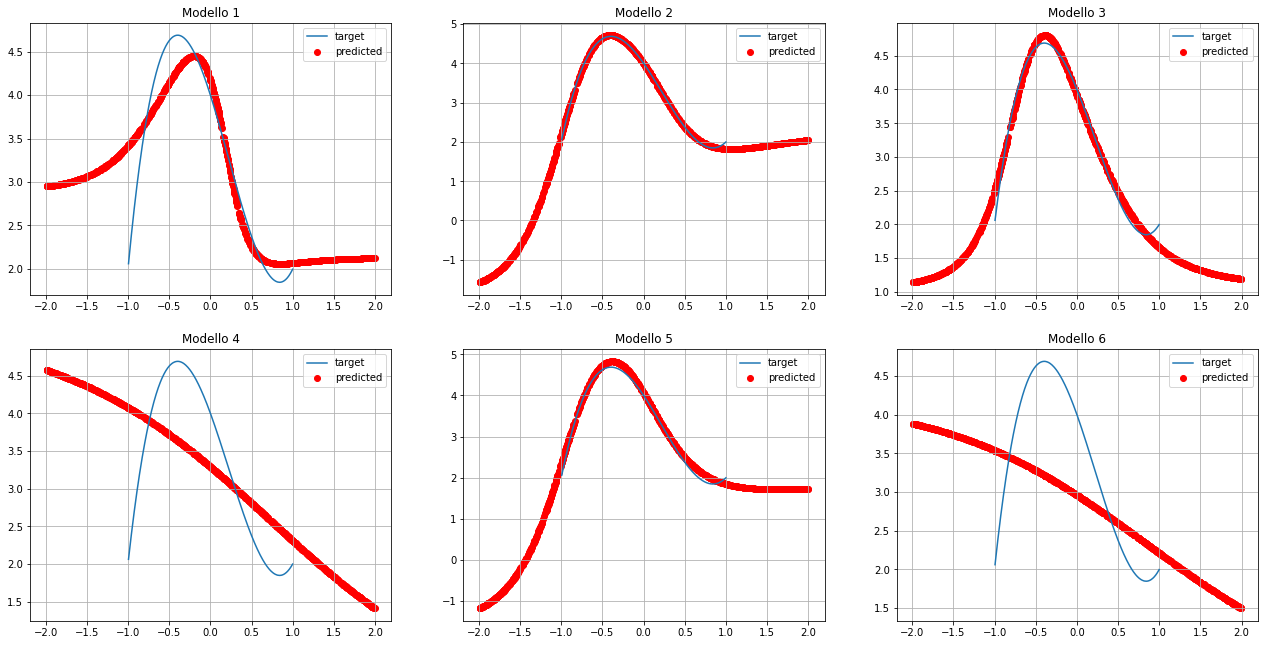

In [129]:
x_predicted1 = np.random.uniform(-2, 2, 1000)
y_predicted1 = model1.predict(x_predicted1)
y_predicted2 = model2.predict(x_predicted1)
y_predicted3 = model3.predict(x_predicted1)
y_predicted4 = model4.predict(x_predicted1)
y_predicted5 = model5.predict(x_predicted1)
y_predicted6 = model6.predict(x_predicted1)

plt.figure(figsize=[22,11])
plt.subplot(2,3,1)
plt.scatter(x_predicted1, y_predicted1,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.title('Modello 1')
plt.legend()
plt.grid(True)
plt.subplot(2,3,2)
plt.scatter(x_predicted1, y_predicted2,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.title('Modello 2')
plt.legend()
plt.grid(True)
plt.subplot(2,3,3)
plt.scatter(x_predicted1, y_predicted3,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.title('Modello 3')
plt.legend()
plt.grid(True)
plt.subplot(2,3,4)
plt.scatter(x_predicted1, y_predicted4,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.title('Modello 4')
plt.legend()
plt.grid(True)
plt.subplot(2,3,5)
plt.scatter(x_predicted1, y_predicted5,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.title('Modello 5')
plt.legend()
plt.grid(True)
plt.subplot(2,3,6)
plt.scatter(x_predicted1, y_predicted6,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.title('Modello 6')
plt.legend()
plt.grid(True)
plt.show()

### Commenti

- I modelli 4 e 6 risultano decisamente sbagliati; l'optimizer adagrad è decisamente inadatto allo scopo.

- Il modello 1 descrive bene i dati solo in un piccolo sottointervallo (0,0.5) dell'intervallo di training; è anche il modello più semplice tra quelli adottati, si può quindi pensare che la funzione da riprodurre sia troppo complessa per l'architettura del modello 1.

- Il modello 3 devia sensibilmente dai dati agli estremi dell'intervallo di test e in un breve intervallo centrale, vicino al massimo della funzione; l'utilizzo delle funzioni di attivazione softplus peggiora il risultato (rispetto al modello 2); deviando dai dati agli estremi dell'intervallo, questo modello avrà anche un potere predittivo molto basso.

- Il modello 5 ed il modello 2 sono i due modelli che riproducono al meglio i dati target ("reali"), ma il modello 5, che utilizza la Minimum absolute error, invece della Minimum squared error, come loss function, è leggermente peggiore.

- Il modello 2 è il migliore tra quelli utilizzati, e riproduce affidabilmente i dati nell'intervallo di training; al di fuori dell'intervallo di training sembra comunque avere poco potere predittivo, soprattutto per x>1;


Il numero maggiore di parametri del modello 2 lo rende il migliore a riprodurre la funzione dalla quale sono stati generati i dati, tuttavia l'utilizzo di diverse funzioni di attivazione, optimizer e loss function può cambiare, leggermente ma anche sensibilmente, il risultato della rete neurale; serve comunque almeno un layer con attivazione Sigmoid per riprodurre una funzione non lineare; si può provare ad aumentare leggermente la complessità del modello per vedere se si può aumentare il potere predittivo al di fuori dell'intervallo di training, ma comunque aumentare troppo la complessità della rete (rispetto ad una funzione che ha comunque solo 4 parametri) può generare risultati migliori all'interno dell'intervallo di training ma peggiori al di fuori.